# msprime
- msprime is a population genetics simulator based on tskit. Msprime can simulate random ancestral histories for a sample of individuals (consistent with a given demographic model) under a range of different models and evolutionary processes. Msprime can also simulate mutations on a given ancestral history (which can be produced by msprime or other programs supporting tskit) under a variety of genome sequence evolution models.
- doc: https://tskit.dev/msprime/docs/latest/intro.html

In [7]:
!pip install msprime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import msprime
msprime.__version__

'1.2.0'

## Ancestry

In [9]:
import msprime
from IPython.display import SVG, display

# Simulate an ancestral history for 3 diploid samples under the coalescent
# with recombination on a 5kb region with human-like parameters.
ts = msprime.sim_ancestry(
    samples=3,
    recombination_rate=1e-8,
    sequence_length=5_000,
    population_size=10_000,
    random_seed=123456)
ts

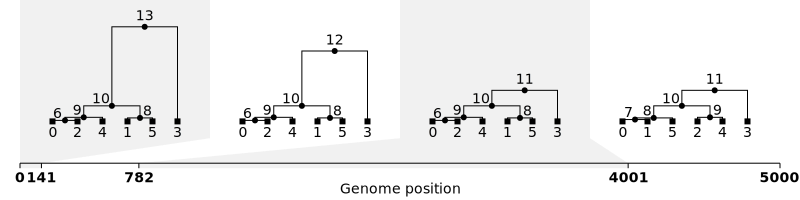

In [10]:
# Visualise the simulated ancestral history.
SVG(ts.draw_svg())

## Mutations

In [14]:
mutated_ts

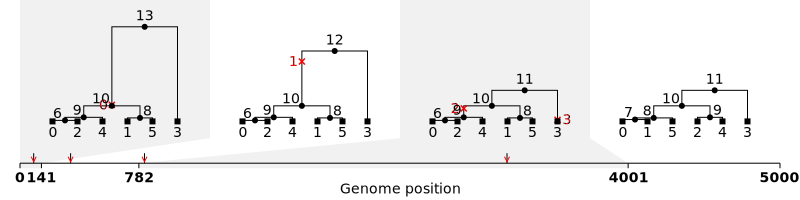

In [13]:
# We generate some mutations for the tree sequence simulated in the previous section under the Jukes-Cantor model

mutated_ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=54321)

# This visualisation shows us where the mutations occurred both in terms of position along the genome 
# (the tick marks with red chevrons on the x-axis) and the branches of trees that they occurred on (the red crosses).

SVG(mutated_ts.draw_svg())

In [15]:
# sites

mutated_ts.tables.sites

id,position,ancestral_state,metadata
0,90,T,
1,333,G,
2,819,T,
3,3204,A,


In [16]:
# mutations

mutated_ts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,10,12191.40649541,G,-1,
1,1,10,44173.26473294,C,-1,
2,2,9,9597.21952351,G,-1,
3,3,3,1158.42914901,C,-1,


In [17]:
# variants

for variant in mutated_ts.variants():
    print(variant)

╔═══════════════════════════════╗
║Variant                        ║
╠═══════════════════════╤═══════╣
║Site id                │      0║
╟───────────────────────┼───────╢
║Site position          │   90.0║
╟───────────────────────┼───────╢
║Number of samples      │      6║
╟───────────────────────┼───────╢
║Number of alleles      │      2║
╟───────────────────────┼───────╢
║Samples with allele 'T'│1 (17%)║
╟───────────────────────┼───────╢
║Samples with allele 'G'│5 (83%)║
╟───────────────────────┼───────╢
║Has missing data       │  False║
╟───────────────────────┼───────╢
║Isolated as missing    │   True║
╚═══════════════════════╧═══════╝

╔═══════════════════════════════╗
║Variant                        ║
╠═══════════════════════╤═══════╣
║Site id                │      1║
╟───────────────────────┼───────╢
║Site position          │  333.0║
╟───────────────────────┼───────╢
║Number of samples      │      6║
╟───────────────────────┼───────╢
║Number of alleles      │      2║
╟────────────

In [19]:
# sim_ancestry

L = 5_000  # simulate 1 megabase length (could increase for a larger example)
rho = mu = 1e-8  # Human-like recombination and mutation parameters
n_subpops = 2
subpop_size = 1e4
migration_rate = 1e-4

# Create a mutationless diploid tree sequence of n_subpops demes
ts_no_mut = msprime.sim_ancestry(
    samples={f"pop_{i}": 10 for i in range(n_subpops)},  # 10 samples from each subpop
    demography=msprime.Demography.island_model([subpop_size] * n_subpops, migration_rate),
    ploidy=2,
    recombination_rate=rho,
    sequence_length=L,
    random_seed=123,
)

# Optionally, add neutral mutations later, after simulating. This takes some CPU time
# (although it is usually fast compared to simulating the original tree sequence)
ts_mutated = msprime.sim_mutations(ts_no_mut, rate=mu, random_seed=456)
print(
    "Adding mutations has increased the tree sequence file size by "
    f"{ts_mutated.nbytes / ts_no_mut.nbytes * 100:.0f}%",
)
ts_mutated

Adding mutations has increased the tree sequence file size by 121%


# Demography

In [ ]:
# By default ancestry simulations assume an extremely simple population structure 
# in which a single randomly mating population of a fixed size exists for all time. 
# For most simulations this is an unrealistic assumption, and so msprime provides 
# a way to describe more complex demographic models using the demography API.


In [21]:
# For example, here we define a simple three population model in which populations “A” and “B” split from “C” 500 generations ago:

demography = msprime.Demography()
demography.add_population(name="A", initial_size=10_000)
demography.add_population(name="B", initial_size=5_000)
demography.add_population(name="C", initial_size=1_000)
demography.add_population_split(time=500, derived=["A", "B"], ancestral="C")
demography

Demography(populations=[Population(initial_size=10000, growth_rate=0, name='A', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=5000, growth_rate=0, name='B', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=1000, growth_rate=0, name='C', description='', extra_metadata={}, default_sampling_time=500, initially_active=False, id=2)], events=[PopulationSplit(time=500, derived=['A', 'B'], ancestral='C')], migration_matrix=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))

In [22]:
# We can then simulate ancestral histories conditioned on these models using sim_ancestry(). 
# For example, here we simulate 5 diploid sample individuals from populations “A” and “B”:

ts = msprime.sim_ancestry({"A": 5, "B": 5}, demography=demography, random_seed=123)
ts

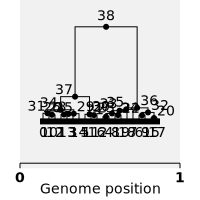

In [23]:
SVG(ts.draw_svg())